In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection and Analysis

In [3]:
insurance_dataset = pd.read_csv("/content/insurance.csv")

In [4]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_dataset.shape

(1338, 7)

In [6]:
# getting information from dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Categorical features
- sex
- smoker
- region

In [7]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data visualization

In [8]:
# statistical measures
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

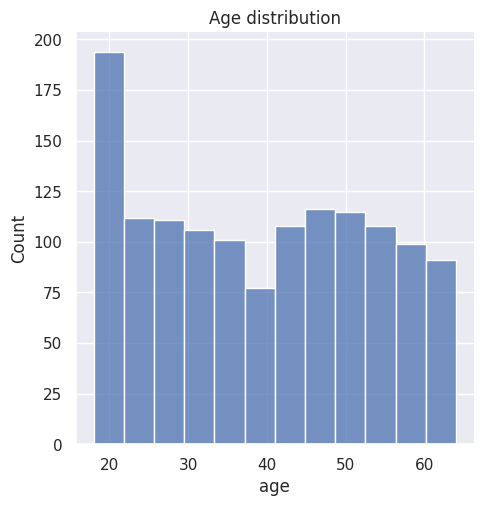

In [9]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset["age"])
plt.title("Age distribution")
plt.show()

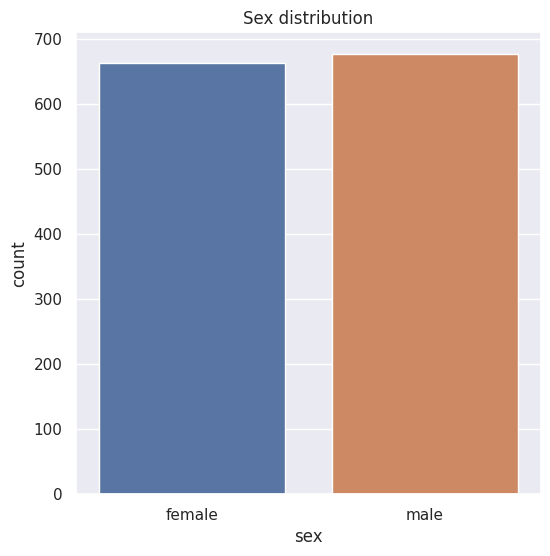

In [10]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x="sex", data=insurance_dataset)
plt.title("Sex distribution")
plt.show()

In [11]:
insurance_dataset["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 600x600 with 0 Axes>

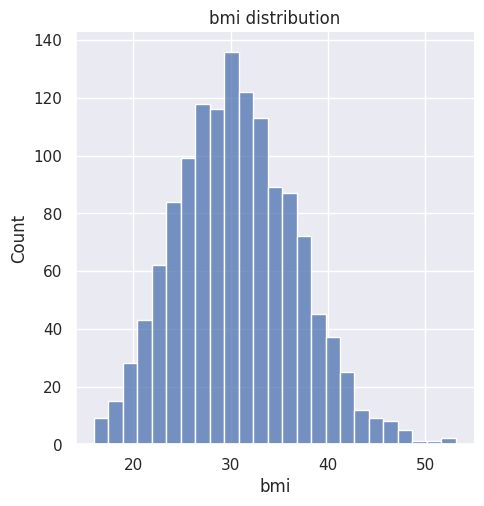

In [12]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset["bmi"])
plt.title("bmi distribution")
plt.show()

Normal BMI range: 18.5 -> 24.9

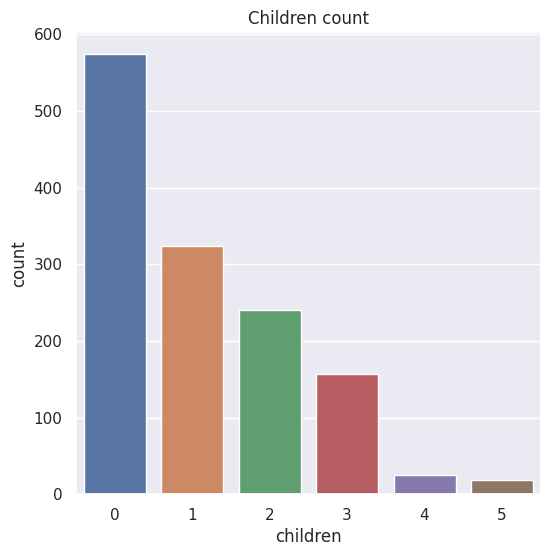

In [13]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x="children", data=insurance_dataset)
plt.title("Children count")
plt.show()

In [14]:
insurance_dataset["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

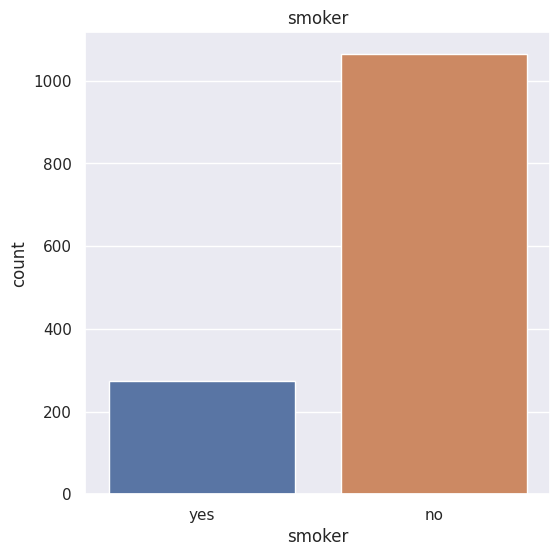

In [16]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x="smoker", data=insurance_dataset)
plt.title("smoker")
plt.show()

In [17]:
insurance_dataset["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

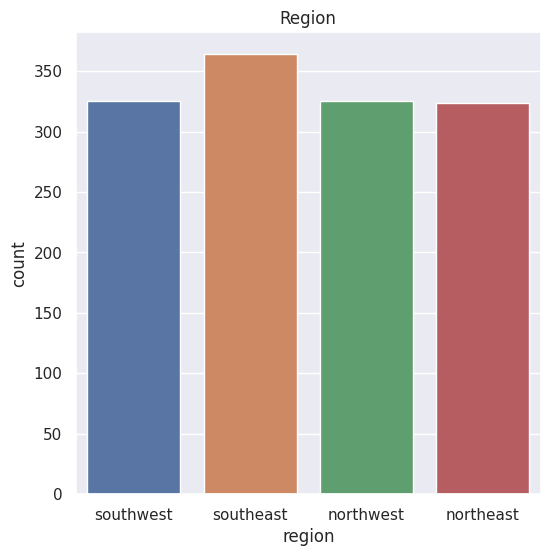

In [18]:
# Region column
plt.figure(figsize=(6,6))
sns.countplot(x="region", data=insurance_dataset)
plt.title("Region")
plt.show()

In [19]:
insurance_dataset["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 600x600 with 0 Axes>

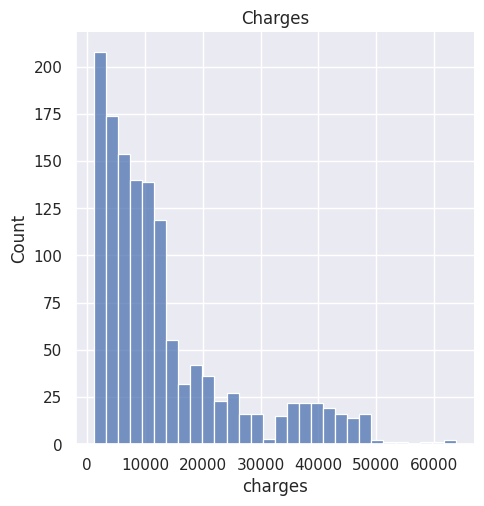

In [20]:
# Charges
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset["charges"])
plt.title("Charges")
plt.show()

# Data preprocessing

Encoding the categorical features

In [22]:
# encoding sex column
insurance_dataset.replace({"sex":{"male":0, "female":1}}, inplace=True)

# encoding smoker column
insurance_dataset.replace({"smoker":{"yes":0, "no":1}}, inplace=True)

# encoding region column
insurance_dataset.replace({"region":{"southeast":0, "southwest":1, "northeast":2, "northwest":3}}, inplace=True)

In [23]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


# Splitting the Features and Target

In [24]:
X = insurance_dataset.drop(columns="charges", axis=1)
y = insurance_dataset["charges"]

In [25]:
X, y

(      age  sex     bmi  children  smoker  region
 0      19    1  27.900         0       0       1
 1      18    0  33.770         1       1       0
 2      28    0  33.000         3       1       0
 3      33    0  22.705         0       1       3
 4      32    0  28.880         0       1       3
 ...   ...  ...     ...       ...     ...     ...
 1333   50    0  30.970         3       1       3
 1334   18    1  31.920         0       1       2
 1335   18    1  36.850         0       1       0
 1336   21    1  25.800         0       1       1
 1337   61    1  29.070         0       0       3
 
 [1338 rows x 6 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

# Splitting the data into Training data & Testing data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [29]:
X.shape, X_train.shape, X_test.shape

((1338, 6), (1070, 6), (268, 6))

# Model training: Linear Regression

In [30]:
regressor = LinearRegression()

In [31]:
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [33]:
# R square value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print(r2_train)

0.751505643411174


In [34]:
# testing data
testing_data_prediction = regressor.predict(X_test)

In [36]:
# R squre value
r2_test = metrics.r2_score(y_test, testing_data_prediction)
print(r2_test)

0.7447273869684076


# Build a predictive system

In [37]:
input_data = (31,1,25.74,0,1,0)
input_data_np = np.asarray(input_data)
input_data_reshaped = input_data_np.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print(prediction)


[3760.0805765]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
